<a href="https://colab.research.google.com/github/na-yeri/Carseats-Colab/blob/main/Carseats_%EB%A7%A4%EC%B6%9C_%EC%98%88%EC%B8%A1_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.font_manager as fm
import statsmodels.formula.api as smf

Mounted at /content/drive


In [2]:
# 데이터 불러오기
file_path = '/content/drive/MyDrive/dataset/Carseats.csv'
Carseats = pd.read_csv(file_path, delimiter=',', na_values=['?'])
Carseats = Carseats.dropna()
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


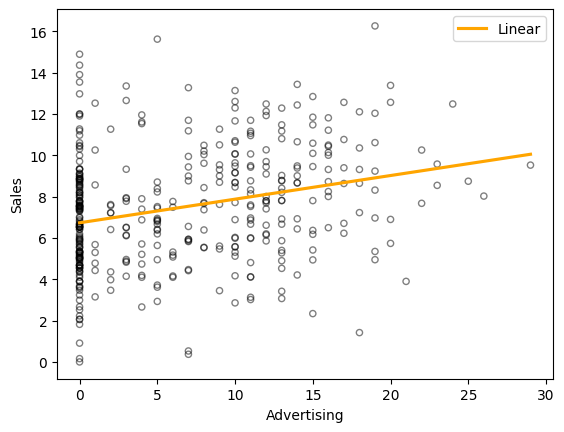

In [3]:
# 광고비에 따른 매출
plt.scatter(x=Carseats.Advertising, y = Carseats.Sales, facecolors='None', edgecolors='k', alpha=.5, s=20)
sns.regplot(x=Carseats.Advertising, y=Carseats.Sales, ci=None, label='Linear', scatter=False, color='orange')
plt.legend()
plt.show()

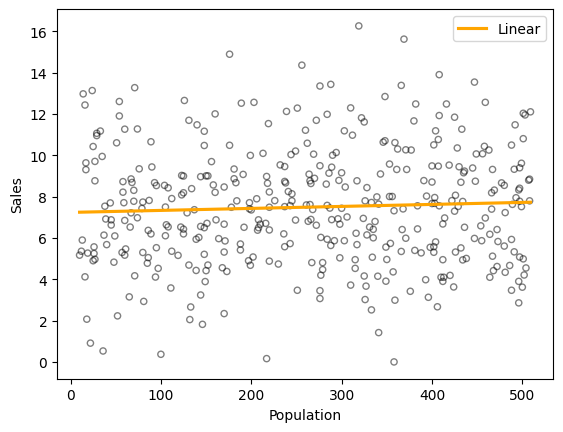

In [4]:
# 인구 수에 따른 매출
plt.scatter(x=Carseats.Population, y = Carseats.Sales, facecolors='None', edgecolors='k', alpha=.5, s=20)
sns.regplot(x=Carseats.Population, y=Carseats.Sales, ci=None, label='Linear', scatter=False, color='orange')
plt.legend()

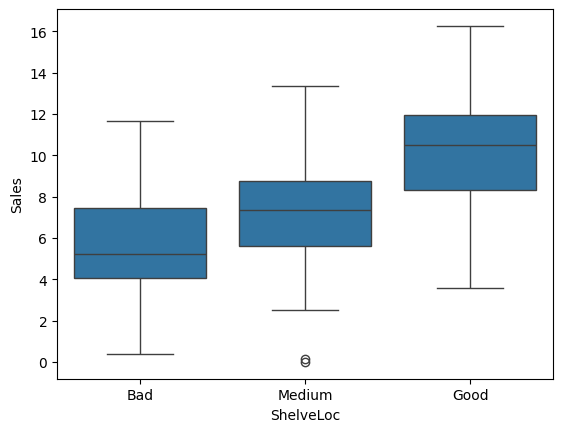

In [5]:
# 진열대 위치에 따른 매출
sns.boxplot(x='ShelveLoc', y='Sales', data=Carseats,
            order=['Bad', 'Medium', 'Good']) # 순서 지정
plt.show()

In [6]:
# 성능 측정
model = smf.ols('Sales ~ Advertising', data=Carseats)
olsfit = model.fit()
print(olsfit.summary())

# → 광고비는 유의미한 변수이긴 하지만(p-value), Sales를 설명할 수 있는 유일한 변수로는 약하다.(R-Squared)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     31.17
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           4.38e-08
Time:                        06:41:39   Log-Likelihood:                -967.27
No. Observations:                 400   AIC:                             1939.
Df Residuals:                     398   BIC:                             1947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7370      0.192     35.007      

In [7]:
# 성능 측정
model = smf.ols('Sales ~ Population', data=Carseats)
olsfit = model.fit()
print(olsfit.summary())
# → 설명력도 낮고 의미도 없는 변수

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.016
Date:                Wed, 09 Jul 2025   Prob (F-statistic):              0.314
Time:                        06:41:45   Log-Likelihood:                -981.84
No. Observations:                 400   AIC:                             1968.
Df Residuals:                     398   BIC:                             1976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2402      0.291     24.909      0.0

In [13]:
# 성능 측정
model = smf.ols('Sales ~ Age', data=Carseats)
olsfit = model.fit()
print(olsfit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     22.60
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           2.79e-06
Time:                        06:49:56   Log-Likelihood:                -971.31
No. Observations:                 400   AIC:                             1947.
Df Residuals:                     398   BIC:                             1955.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6512      0.474     20.376      0.0

In [8]:
# 성능 측정
model = smf.ols('Sales ~ Advertising + Price + ShelveLoc', data=Carseats)
olsfit = model.fit()
print(olsfit.summary())
# → 변수 한두개씩 추가해보기

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     153.5
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           4.48e-79
Time:                        06:41:57   Log-Likelihood:                -794.81
No. Observations:                 400   AIC:                             1600.
Df Residuals:                     395   BIC:                             1620.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.4680    

In [9]:
# 성능 측정
model = smf.ols('Sales ~  Price + ShelveLoc + Income + CompPrice', data=Carseats)
olsfit = model.fit()
print(olsfit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     212.2
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          2.24e-109
Time:                        06:42:13   Log-Likelihood:                -721.08
No. Observations:                 400   AIC:                             1454.
Df Residuals:                     394   BIC:                             1478.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.1608    

In [10]:
# 성능 측정
model = smf.ols('Sales ~  Price + ShelveLoc + Age + CompPrice', data=Carseats)
olsfit = model.fit()
print(olsfit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     262.2
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          6.72e-123
Time:                        06:42:24   Log-Likelihood:                -689.39
No. Observations:                 400   AIC:                             1391.
Df Residuals:                     394   BIC:                             1415.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.8016    

In [11]:
# 성능 측정
model = smf.ols('Sales ~  CompPrice + Income+Advertising+Population+Price+ShelveLoc+Age+Education+Urban+US', data=Carseats)
olsfit = model.fit()
print(olsfit.summary())

# → 모든 변수 넣어보기

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          1.60e-166
Time:                        06:42:38   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606    

In [12]:
# 성능 측정
model = smf.ols('Sales ~  CompPrice + Income + Advertising + Price + ShelveLoc + Age', data=Carseats)
olsfit = model.fit()
print(olsfit.summary())

# → p-value를 보고 의미 없는 변수 빼기

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          1.25e-170
Time:                        06:42:51   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.4752    